### Python Basico II

In [21]:
import numpy as np # alias parapoder llamarla, como una especie de apodo
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import time 

print(np.__version__)

1.26.4


### Numpy

In [22]:
# Para trabajar con vectores y matrices
rng = np.random.default_rng(0) # Para generar números aleatorios que depende de una semilla
print('rng',rng)
a = np.array([1,2,3,4,5], dtype=float) # lo transformo en vector a partir de una lista. Ya no hay comas si no puntos
print(a)
# otra forma de crear lista
b = np.arange(0,10,2) # crea un vector con los números comprendidos entre 0 y 10 saltando de 2 en 2
c = np.linspace(0,1,5) # igual, entre 0 y 1 lo divido entre 5
Z = np.zeros((3,4)) # matriz de zeros que tenga 3x4
I = np.eye(3) # matriz identidad de tamaño 3x3

print(b)
print(c)
print(Z)
print(I)

rng Generator(PCG64)
[1. 2. 3. 4. 5.]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [23]:
#Como acceder a los elementos de un array
X = np.array(([1,2,3],[4,5,6],[7,8,9]))
print(X)
print(X[1,1])
print(X[1,:])
print(X[1:,1:])

mask = X%2 == 0
print("X mask:",X[mask])


[[1 2 3]
 [4 5 6]
 [7 8 9]]
5
[4 5 6]
[[5 6]
 [8 9]]
X mask: [2 4 6 8]


In [24]:
Y = rng.normal(loc=0., scale=1.0, size=(4,3))
print('Y: \n', Y)
print(Y.mean()) # el valor medio
print(Y.mean(axis=0)) # el valor medio de las columnas
print(Y.sum(axis=1)) # la suma de las filas

Y: 
 [[ 0.12573022 -0.13210486  0.64042265]
 [ 0.10490012 -0.53566937  0.36159505]
 [ 1.30400005  0.94708096 -0.70373524]
 [-1.26542147 -0.62327446  0.04132598]]
0.022070802113584375
[ 0.06730223 -0.08599193  0.08490211]
[ 0.63404801 -0.0691742   1.54734577 -1.84736995]


### Vectorización.
Recordar no hacer opreaciones con bucles si no utilizando las librerías disponibles para ello

In [25]:
## Con esto podemos operar igual que en matemáticas, de forma vectorizada
U = np.random.rand(1000000)
V = np.random.rand(1000000)

z = 0
t1 = time.time()
for u,v in zip(U,V): # para hacer bucle de matriz
    z = z + u*v # resuelve el prod. escalar
t2 = time.time()
print(f'Producto escalar {z} en tiempo: {(t2-t1)*1000} ms')

# Pero con nunpy se tarda menos, como se puede demostrar más abajo
t1 = time.time()
z = np.dot(U,V)
t2 = time.time()
print(f'Producto escalar {z} en tiempo: {(t2-t1)*1000} ms')

Producto escalar 249793.85167136308 en tiempo: 197.32356071472168 ms
Producto escalar 249793.85167135592 en tiempo: 1.9989013671875 ms


In [26]:
## Otro ejemplo de como es más rápido usar las librerias
n = 1000
A = np.random.rand(n,n)
U = np.random.rand(n)

t1 = time.time()
V = np.zeros_like(U)
for i in range(n):
    for j in range(n):
        V[i] += A[i,j]*U[j]
t2 = time.time()
print(f'Producto de AU {V[n//2]} en tiempo: {(t2-t1)*1000} ms')

t1 = time.time()
V = A@U
t2 = time.time()
print(f'Producto de AU {V[n//2]} en tiempo: {(t2-t1)*1000} ms')


Producto de AU 243.73174157857676 en tiempo: 409.2998504638672 ms
Producto de AU 243.73174157857733 en tiempo: 2.0101070404052734 ms


### Broadcasting
Hay operaciones que matemáticamente no tienen sentido pero python hace que estas operaciones tengan sentido y por lo tanto te de el resultado. Sobre todo en tema de dimensiones... etc.

In [27]:
U = np.array([1,2,3,4,5])
k = 100
V = U+k
print(V)

[101 102 103 104 105]


In [58]:
A = np.reshape(range(1,7), (2,3)) # esto es para darle tamaño a la matriz
print('A',A)
B = np.array([100,200,300])
print(B)
C = A+B
print('C', C)

A [[1 2 3]
 [4 5 6]]
[100 200 300]
C [[101 202 303]
 [104 205 306]]


In [29]:
# Si en vez de lo de arriba hago lo mismo pero B es de 1x2? NO, tienen que tener el mismo número de columnas
# Para arrglarlo hay que especificar si el vector es fila o columna
# Nosotros lo vamos a utilizar para matrices de datos, en muchas ocasiones se necesita que estén estandarizadas y lo que se hace es sacar la media y dividir entre la desviación típica
A = np.reshape(range(1,7), (2,3)) # esto es para darle tamaño a la matriz
print('A',A)
B = np.array([100,200]).reshape((2,1))
print(B)
C = A+B
print('C', C)

A [[1 2 3]
 [4 5 6]]
[[100]
 [200]]
C [[101 102 103]
 [204 205 206]]


In [30]:
data = rng.normal(size=(4,3))
print('Data: \n data')

#media = np.mean(data, axis=0, keepdims=True) # Muy importante el keepdims, para que mantenga siempre las medidas
media = data.mean(axis=0).reshape(1,-1) # quiero que tenga una fila y el resto me lo organizas en columnas. Si quisiera que fuera vector columna haría -1,1
print(media)

data_std = (data-media)/data.std(axis=0,keepdims=True) # al ser vector fila la operación se hace correctamente. Lo del final es la desviación estandar de data
# a data le ha quitado la media de su columna y la ha dividido entre la desviación típica de esa columna para obtener los datos en estandarizados

Data: 
 data
[[-0.31980103 -0.09643299 -0.33480892]]


### Matplotlib
Librería que sirve para hacer gráficas. Muy útil

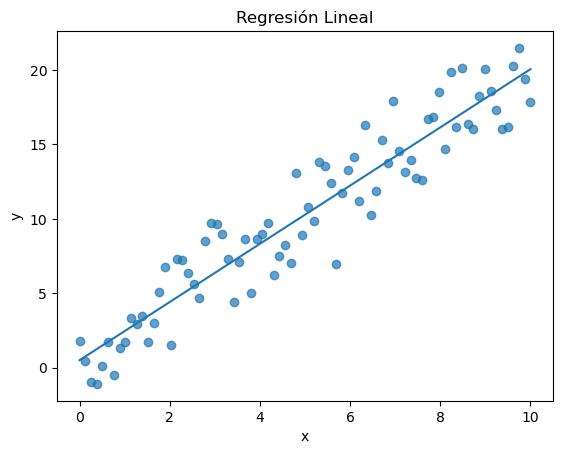

In [31]:
# definimos un vector
x = np.linspace(0, 10, 80) # vector de 80 elementos entre 0 y 10

# rng = np.random.default_rng(0) # Para generar números aleatorios que depende de una semilla (se define arriba del todo)
y = 2.*x + 1.*rng.normal(scale=2., size=x.size) # hace 2 veces x + ruido aleatorio gaussiano. Scale es la deviación estándar y size el tamaño de salida
# rng.normal(scale=2., size=x.size) genera un array de longitud x.size con valores aleatorios de una normal de media 0 y desviación estándar 2.
# Esto se hace para que no me quede solo como 2 x

m,c = np.polyfit(x,y,deg=1) # me devuelve el polinomio que ajusta con x e y el polinomio

# hacemos la gráfica

plt.figure() 
plt.scatter(x,y,alpha=0.7) # hago una gráfica de puntos y con alpha le digo el tamaño de los puntos
plt.plot(x,m*x+c) # con esto se hace la línea continua
plt.title('Regresión Lineal')
plt.xlabel('x');plt.ylabel('y')
plt.show()


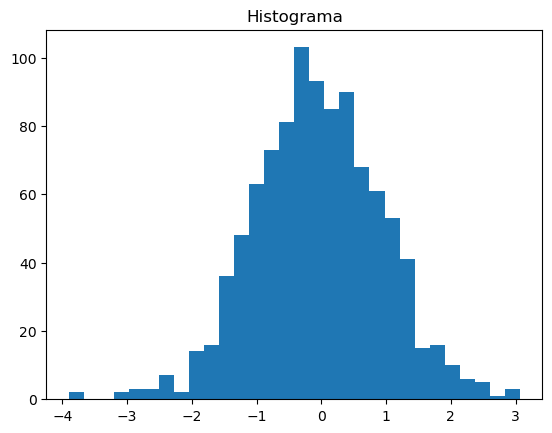

In [32]:
# Para hacer un histograma
z = rng.normal(size=1000)
plt.figure()
plt.hist(z, bins=30)
plt.title('Histograma')
plt.show()

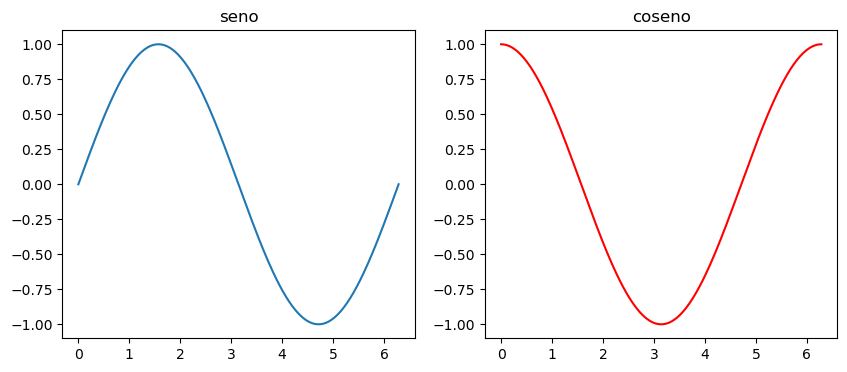

In [33]:
x = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, np.sin(x))
plt.title('seno')

plt.subplot(1,2,2)
plt.plot(x,np.cos(x),c='r')
plt.title('coseno')

plt.show()

### Pandas
Se utiliza para trabajar con conjuntos de datos

In [34]:
frutas = [['pera', 3.3, 10.5, 'España'],['piña', 3.7, 12, 'Brazil'],['coco', 5.3, 5, 'Dominicana']] # creo una lista de listas
columnas = ['Nombre','Precio','Stock','Procedencia']
df = pd.DataFrame(data= frutas, columns=columnas) # te ordena los datos por columnas y filas con los datos que tu quieras meter
display(df)

# Los nombres de las columnas actúan como una especie de índice
print('Precio -->',df['Precio'])
print(df[['Nombre', 'Precio']])

frutas_comprar = df[df['Stock']<=10] # aquí le puedes decir con doble corchete lo que cumple con las condiciones de que el stock sea menor que 10
display(frutas_comprar)

display(df.sort_values('Precio',ascending=False))

,Nombre,Precio,Stock,Procedencia
0,pera,3.3,10.5,España
1,piña,3.7,12.0,Brazil
2,coco,5.3,5.0,Dominicana


Precio --> 0    3.3
1    3.7
2    5.3
Name: Precio, dtype: float64
  Nombre  Precio
0   pera     3.3
1   piña     3.7
2   coco     5.3


,Nombre,Precio,Stock,Procedencia
2,coco,5.3,5.0,Dominicana


,Nombre,Precio,Stock,Procedencia
2,coco,5.3,5.0,Dominicana
1,piña,3.7,12.0,Brazil
0,pera,3.3,10.5,España


In [ ]:
df1= df.copy()
print(df1.iloc[2]) #te dice todo lo asociado al índice número 2, que es el coco
print(df1.iloc[2]['Procedencia'])

display(df1.set_index('Nombre', inplace=True))
display(df1)
print(df1.loc['coco']['Procedencia']) # el loc es para trabajar por registros, si quisieramos trabajar por columnas es directamente poner el nombre de la columna

Nombre               coco
Precio                5.3
Stock                 5.0
Procedencia    Dominicana
Name: 2, dtype: object
Dominicana


None

,Precio,Stock,Procedencia
Nombre,,,
pera,3.3,10.5,España
piña,3.7,12.0,Brazil
coco,5.3,5.0,Dominicana


Dominicana


In [ ]:
df2 = df.copy()
df2.loc[2,'Precio'] = np.nan # nan es un not a number, nos va a ocurrir mucho donde no tenemos todos los datos y haya registros incompletos
display(df2)

display(df2.dropna()) # con esto nos quitamos los registros que son NaN
# otra posibilidad es rellenarlo con la que he quitado, osea con lo que está vacío. Le meto un 5
display(df2['Precio'].fillna(5))
# o lo relleno con el valor medio
display(df2['Precio'].fillna(df2['Precio'].median()))

,Nombre,Precio,Stock,Procedencia
0,pera,3.3,10.5,España
1,piña,3.7,12.0,Brazil
2,coco,NaN,5.0,Dominicana


,Nombre,Precio,Stock,Procedencia
0,pera,3.3,10.5,España
1,piña,3.7,12.0,Brazil


0    3.3
1    3.7
2    5.0
Name: Precio, dtype: float64

0    3.3
1    3.7
2    3.5
Name: Precio, dtype: float64

In [43]:
x = df[['Stock']].to_numpy() # al poner dos corchetes me lo convierte en un vector columna
y = df['Precio'].to_numpy() # al poner un corchete me lo convierte en un vector fila
x_flatten = x.flatten()
print(x_flatten)
print(x)
print(y)
df['Valor'] = np.dot(x.flatten(),y) # producto escalar de precio * stock y el flatten lo que hace es que te cambia la disposición de x
display(df)

[10.5 12.   5. ]
[[10.5]
 [12. ]
 [ 5. ]]
[3.3 3.7 5.3]


,Nombre,Precio,Stock,Procedencia,Valor
0,pera,3.3,10.5,España,105.55
1,piña,3.7,12.0,Brazil,105.55
2,coco,5.3,5.0,Dominicana,105.55


### Clases Programación Orientada a Objetos

In [ ]:
# Python tiene diferentes paradigmas de programación
# Vamos a ver ahora clases que definen objetos que comparten una serie de características

In [55]:
class Alumno: # el alumno va a tener atributos y características específicas y se va a llamar a esta función que va a ser estandar y le vas a meter todo lo demás
    def __init__ (self, nombre, edad, notas): # todas las funciones de una clase tienen como primer parámetro el self, que trata de que cuando yo llame a cualquier elemento de la clase este self hace referencia a cualquier elementos de la clase
        # cuando yo llame al método init le estoy diciendo que el nombre es tal
        self.nombre = nombre
        self.edad= edad
        self.notas = notas
    
    def aprobado(self):
        if sum(self.notas)/len(self.notas)>=5:
            return True
        else:
            return False

alumno_1 = Alumno('Ana', 22, [4.5, 7.8])
print(alumno_1.edad)
print('aprobado',alumno_1.aprobado()) #aprobado no es una característica es una función

22
aprobado True


In [57]:
class ColumnSelectorSimple:
    def __init__(self, min_variance=0.):
        self.min_variance = min_variance
        self.indices_ = None # no es un parámetro que se lo esté pasando al constructor
    
    def fit(self, X): # uno de los métodos clásicos
        X = np.asarray(X) # lo convierto enun array por si viene como un dataframe
        variances = X.var(axis=0) # defino la varianza por columnas, esto se especifica con el parámetro axis = 0
        self.indices_ = np.where(variances>self.min_variance)[0] # Filtra y guarda los índices donde variances > self.min_variance. Índices donde se cumple que la varianza es mayor que el valor mínimo que hemos definido
        return self # como hemos actualizado el valro de índices le decimos que lo devuelva
    
    def transform(self,X):
        X = np.asarray(X)
        return X[:, self.indices_]
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

X = np.array([[1.0, 10.0, 5.0],
              [1.0, 20.0, 6.0],
              [1.0, 30.0, 7.0]])

selector = ColumnSelectorSimple(min_variance=1.)
Xs = selector.fit_transform(X)

print('indices ', selector.indices_)
print('Xs: \n', Xs)

indices  [1]
Xs: 
 [[10.]
 [20.]
 [30.]]
